In [1]:
!pip install numpy=='1.22.3'
!pip install -U ipywidgets
!pip install -q ultralytics
!pip install -q gdown

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 64.9 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.8.0 requires cubinlinker, which is not installed.
cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 23.8.0 requires ptxcompiler, which is not installed.
cuml 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.7 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 11.0.0 which is incompatible.
chex 0.1.85 requires numpy>=1.24.1, but you have numpy 1.22.3 

In [20]:
import shutil
import json
import os

from tqdm import tqdm
from ultralytics import YOLO
import pandas as pd
import yaml
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import numpy as np

In [21]:
d = {'1_1': 'RailwayCrossingBarrier',
 '1_2': 'RailwayCrossingNoBarrier',
 '1_3_1': 'SingleTrackRailway',
 '1_3_2': 'MultipleTrackRailway',
 '1_4': 'ApproachRailwayCrossing',
 '1_5': 'TramCrossing',
 '1_6': 'IntersectionEqualRoads',
 '1_7': 'RoundaboutIntersection',
 '1_8': 'TrafficLightsControl',
 '1_9': 'Drawbridge',
 '1_10': 'DriveToEmbankment',
 '1_11': 'DangerousTurn',
 '1_11_1': 'DangerousTurnRight',
 '1_11_2': 'DangerousTurnLeft',
 '1_12': 'DangerousTurns',
 '1_12_1': 'DangerousTurnsFirstRight',
 '1_12_2': 'DangerousTurnsFirstLeft',
 '1_13': 'SteepDescent',
 '1_14': 'SteepAscent',
 '1_15': 'SlipperyRoad',
 '1_16': 'UnevenRoad',
 '1_17': 'ArtificialUnevenness',
 '1_18': 'GravelSpill',
 '1_19': 'DangerousShoulder',
 '1_20': 'RoadNarrowing',
 '1_20_1': 'RoadNarrowing',
 '1_20_2': 'RoadNarrowing',
 '1_20_3': 'RoadNarrowing',
 '1_21': 'TwoWayTraffic',
 '1_22': 'PedestrianCrossing',
 '1_23': 'Children',
 '1_24': 'IntersectionBikePedestrianPath',
 '1_25': 'RoadWorks',
 '1_26': 'CattleCrossing',
 '1_27': 'WildAnimals',
 '1_28': 'FallingRocks',
 '1_29': 'SideWind',
 '1_30': 'LowFlyingAircrafts',
 '1_31': 'Tunnel',
 '1_32': 'TrafficJam',
 '1_33': 'OtherHazards',
 '1_34_1': 'DirectionTurn',
 '1_34_2': 'DirectionTurn',
 '1_34_3': 'DirectionTurn',
 '2_1': 'MainRoad',
 '2_2': 'EndOfMainRoad',
 '2_3': 'IntersectionMinorRoad',
 '2_3_1': 'IntersectionMinorRoad',
 '2_3_2': 'IntersectionMinorRoad',
 '2_3_3': 'IntersectionMinorRoad',
 '2_3_4': 'IntersectionMinorRoad',
 '2_3_5': 'IntersectionMinorRoad',
 '2_3_6': 'IntersectionMinorRoad',
 '2_4': 'Yield',
 '2_5': 'NoStopping',
 '2_6': 'OncomingTrafficPriority',
 '2_7': 'PriorityOverOncomingTraffic',
 '3_1': 'NoEntry',
 '3_2': 'NoEntryVehicles',
 '3_3': 'NoEntryMechanizedVehicles',
 '3_4': 'NoEntryTrucks',
 '3_4_1': 'NoEntryTrucks',
 '3_5': 'NoEntryMotorcycles',
 '3_6': 'NoEntryTractors',
 '3_7': 'NoEntryTrailers',
 '3_8': 'NoEntryCarts',
 '3_9': 'NoEntryBicycles',
 '3_10': 'NoEntryPedestrians',
 '3_11': 'WeightLimit',
 '3_12': 'AxleWeightLimit',
 '3_13': 'HeightLimit',
 '3_14': 'WidthLimit',
 '3_15': 'LengthLimit',
 '3_16': 'MinimumDistanceLimit',
 '3_17_1': 'Customs',
 '3_17_2': 'Danger',
 '3_17_3': 'Control',
 '3_18_1': 'NoRightTurn',
 '3_18_2': 'NoLeftTurn',
 '3_19': 'NoUturn',
 '3_20': 'NoOvertaking',
 '3_21': 'EndOfNoOvertakingZone',
 '3_22': 'NoOvertakingTrucks',
 '3_23': 'EndOfNoOvertakingZoneTrucks',
 '3_24': 'SpeedLimit',
 '3_25': 'EndOfSpeedLimitZone',
 '3_26': 'NoHorn',
 '3_27': 'NoStop',
 '3_28': 'NoParking',
 '3_29': 'NoParkingOddDays',
 '3_30': 'NoParkingEvenDays',
 '3_31': 'EndOfAllRestrictionsZone',
 '3_32': 'NoTransportOfDangerousGoods',
 '3_33': 'NoTransportOfExplosivesAndInflammables',
 '3_34': 'NoBuses',
 '4_1_1': 'StraightAhead',
 '4_1_2': 'TurnRight',
 '4_1_2_1': 'TurnRight',
 '4_1_3': 'TurnLeft',
 '4_1_4': 'StraightOrRight',
 '4_1_5': 'StraightOrLeft',
 '4_1_6': 'RightOrLeft',
 '4_2_1': 'OvertakeObstacleRight',
 '4_2_2': 'OvertakeObstacleLeft',
 '4_2_3': 'OvertakeObstacleRightOrLeft',
 '4_3': 'Roundabout',
 '4_4_1': 'BikePath',
 '4_4_2': 'EndOfBikePath',
 '4_5_1': 'PedestrianPath',
 '4_5_2': 'SharedPedestrianAndBikePath',
 '4_5_3': 'EndOfSharedPedestrianAndBikePath',
 '4_5_4': 'DividedPedestrianAndBikePath',
 '4_5_5': 'DividedPedestrianAndBikePath',
 '4_5_6': 'EndOfDividedPedestrianAndBikePath',
 '4_5_7': 'EndOfDividedPedestrianAndBikePath',
 '4_6': 'MinimumSpeedLimit',
 '4_7': 'EndOfMinimumSpeedLimitZone',
 '4_8_1': 'DirectionOfDangerousGoodsMovement',
 '5_1': 'Highway',
 '5_2': 'EndOfHighway',
 '5_3': 'CarRoad',
 '5_4': 'EndOfCarRoad',
 '5_5': 'OneWayRoad',
 '5_6': 'EndOfOneWayRoad',
 '5_8': 'ReversibleTraffic',
 '5_9': 'EndOfReversibleTraffic',
 '5_10': 'EntryToReversibleTrafficRoad',
 '5_11_1': 'BusLane',
 '5_11_2': 'BikeLane',
 '5_12_1': 'EndOfBusLane',
 '5_12_2': 'EndOfBikeLane',
 '5_13_3': 'EntryToBikeLane',
 '5_13_4': 'EntryToBikeLane',
 '5_15_1': 'DirectionOfLaneTraffic',
 '5_15_2': 'DirectionOfLaneTraffic',
 '5_15_3': 'BeginningOfLane',
 '5_15_4': 'BeginningOfLane',
 '5_15_5': 'EndOfLane',
 '5_15_7': 'DirectionOfLaneTraffic',
 '5_15_8': 'NumberofLanes',
 '5_16': 'BusAndTrolleybusStop',
 '5_17': 'TramStop',
 '5_18': 'TaxiStand',
 '5_19_1': 'PedestrianCrossing',
 '5_20': 'ArtificialUnevenness',
 '5_21': 'ResidentialArea',
 '5_22': 'EndOfResidentialArea',
 '5_25': 'BeginningOfSettlement',
 '5_26': 'EndOfSettlement',
 '5_27': 'ParkingProhibitedZone',
 '5_28': 'EndOfParkingProhibitedZone',
 '5_29': 'RegulatedParkingZone',
 '5_30': 'EndOfRegulatedParkingZone',
 '5_31': 'SpeedLimitZone',
 '5_32': 'EndOfSpeedLimitZone',
 '5_33': 'PedestrianZone',
 '5_34': 'EndOfPedestrianZone',
 '5_35': 'ZoneWithLimitationOfMechanicalVehicleEcologicalClass',
 '5_38': 'EndOfZoneWithLimitationOfVehicleEcologicalClass',
 '6_1': 'GeneralSpeedLimit',
 '6_2': 'RecommendedSpeed',
 '6_3_1': 'TurningPlace',
 '6_3_2': 'TurningZone',
 '6_4': 'ParkingSpace',
 '6_5': 'EmergencyStoppingLane',
 '6_6': 'UndergroundPedestrianCrossing',
 '6_7': 'OverheadPedestrianCrossing',
 '6_8_1': 'DeadEnd',
 '6_8_2': 'DeadEnd',
 '6_8_3': 'DeadEnd',
 '6_9_1': 'PreliminaryDirectionIndicator',
 '6_9_2': 'PreliminaryDirectionIndicator',
 '6_9_3': 'TrafficScheme',
 '6_10_1': 'DirectionIndicator',
 '6_10_2': 'DirectionIndicator',
 '6_11': 'ObjectName',
 '6_12': 'DistanceIndicator',
 '6_13': 'KilometerSign',
 '6_14_1': 'RouteNumber',
 '6_14_2': 'RouteNumber',
 '6_15_1': 'DirectionForTrucks',
 '6_15_2': 'DirectionForTrucks',
 '6_15_3': 'DirectionForTrucks',
 '6_16': 'StopLine',
 '6_17': 'BypassScheme',
 '6_18_1': 'BypassDirection',
 '6_18_2': 'BypassDirection',
 '6_18_3': 'BypassDirection',
 '6_21': 'DirectionToEmergencyExit',
 '6_22': 'PhotoVideoSurveillance',
 '7_1': 'MedicalAidPoint',
 '7_2': 'Hospital',
 '7_3': 'GasStation',
 '7_4': 'CarService',
 '7_5': 'CarWash',
 '7_6': 'Telephone',
 '7_7': 'FoodPoint',
 '7_8': 'DrinkingWater',
 '7_9': 'HotelOrMotel',
 '7_10': 'Camping',
 '7_11': 'RestArea',
 '7_12': 'RoadPatrolPost',
 '7_13': 'Police',
 '7_15': 'TrafficInformationRadioStationReceptionArea',
 '7_16': 'EmergencyServicesRadioCommunicationArea',
 '7_17': 'SwimmingPoolOrBeach',
 '7_18': 'Toilet',
 '7_19': 'EmergencyTelephone',
 '7_20': 'FireExtinguisher',
 '7_21': 'GasStationWithElectricCarCharging',
 '8_1_1': 'DistanceToObject',
 '8_1_2': 'DistanceToObject',
 '8_1_4': 'DistanceToObject',
 '8_5_1': 'SaturdaySundayHoliday',
 '8_5_2': 'WorkingDays',
 '8_5_3': 'DaysOfWeek',
 '8_5_4': 'TimeOfOperation',
 '8_7': 'EngineIdleProhibited',
 '8_8': 'PaidServices',
 '8_10': 'VehicleInspectionPlace',
 '8_11': 'MaximumPermissibleMassLimit',
 '8_12': 'DangerousShoulder',
 '8_13': 'MainRoadDirection',
 '8_13_1': 'MainRoadDirection',
 '8_14': 'TrafficLane',
 '8_15': 'BlindPedestrians',
 '8_16': 'WetSurface',
 '8_17': 'DisabledPersons',
 '8_18': 'ExceptDisabledPersons',
 '8_19': 'HazardousCargoClass',
 '8_2_1': 'ZoneDirection', 
 '8_24': 'TowTruckInOperation',
 '8_25': 'VehicleEcologicalClass',
 '8_3_2': 'ActionsDirection'}

In [22]:
used = {}
for k, v in d.items():
    used[v] = used.get(v,0) + 1
    if used[v] > 1:
        d[k]=f'{v}{used[v]}'

In [23]:
def get_df_annotations(annotations_file, label_map_file, min_area):
    with open(annotations_file, 'r', encoding='utf-8') as file:
        json_data = json.load(file)

    with open(label_map_file) as f:
        label_map = json.load(f)

    id2label = {v: k for k, v in label_map.items()}
#     images_info = {image['id']: image['file_name'] for image in json_data['images']}

    df = pd.DataFrame(json_data['annotations'])
    df['sign_num'] = df['category_id'].map(id2label)
    df['sign_name'] = df['sign_num'].map(d)
    df = df[df['area'] >= min_area]

    return df


def get_balanced_df(df, samples_per_class=100, min_class_num=200):
    balanced_data = []

    for class_id in df['category_id'].value_counts()[df['category_id'].value_counts() >= min_class_num].keys():
        class_data = df[df['category_id'] == class_id]
        sample = class_data.sample(min(samples_per_class, len(class_data)),
                                   replace=False,
                                  random_state=42)
        balanced_data.append(sample)

    balanced_df = pd.concat(balanced_data)
    return balanced_df

In [44]:
root_dataset = '/kaggle/input/rtsd-dataset'

label_map_file = f'{root_dataset}/label_map.json'
labels_path = f'{root_dataset}/labels.txt'

coco_json_train = f'{root_dataset}/train_anno.json'
coco_json_val = f'{root_dataset}/val_anno.json'

path_to_images = f'{root_dataset}/rtsd-frames/rtsd-frames'

path_yolo_dataset = '/kaggle/working/dataset'
output_train = '/kaggle/working/dataset/train'
output_valid = '/kaggle/working/dataset/valid'

samples_per_class = 300
min_area = 900

In [25]:
ann_df = get_df_annotations(coco_json_train, label_map_file, min_area).dropna()
balanced_df = get_balanced_df(ann_df, samples_per_class)
filter_anno = balanced_df.id.to_list()
len(filter_anno)

11763

In [27]:
def convert_coco_to_yolo(coco_json, output_dir, image_dir, filter_anno=None):
    os.makedirs(output_dir, exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'labels'), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'images'), exist_ok=True)

    with open(coco_json) as f:
        data = json.load(f)

    images_info = {image['id']: image for image in data['images']}

    for ann in tqdm(data['annotations']):
        if filter_anno:
            if ann['id'] not in filter_anno:
                continue

        image_info = images_info[ann['image_id']]
        image_file_name = image_info['file_name'].split('/')[1]
        path_to_image = os.path.join(image_dir, image_file_name)

        if not os.path.exists(path_to_image):
            print(image_file_name)
            continue

        category_id = ann['category_id'] - 1

        width, height = image_info['width'], image_info['height']
        x_center = (ann['bbox'][0] + ann['bbox'][2] / 2) / width
        y_center = (ann['bbox'][1] + ann['bbox'][3] / 2) / height
        bbox_width = ann['bbox'][2] / width
        bbox_height = ann['bbox'][3] / height
        
        yolo_format = f"{category_id} {x_center} {y_center} {bbox_width} {bbox_height}\n"

        label_file_name = os.path.splitext(image_file_name)[0] + '.txt'
        labels_output_path = os.path.join(output_dir, 'labels', label_file_name)
        images_output_path = os.path.join(output_dir, 'images', image_file_name)

        with open(labels_output_path, 'a') as file:
            file.write(yolo_format)

        shutil.copy(path_to_image, images_output_path)

In [36]:
convert_coco_to_yolo(coco_json_train,
                     output_train,
                     path_to_images,
                     filter_anno)

100%|██████████| 95492/95492 [01:25<00:00, 1112.64it/s]


In [37]:
convert_coco_to_yolo(coco_json_val,
                     output_valid,
                     path_to_images)

100%|██████████| 8866/8866 [00:10<00:00, 838.40it/s]


In [45]:
with open(coco_json_train) as f:
    data = json.load(f)
images_info = {image['id']: image for image in data['images']}

In [49]:
def img_by_sign_name(sign_num):
    df = ann_df[ann_df.sign_num == sign_num].sample(1).iloc[0]
    im_path = f'{path_to_images}/../{images_info[df.image_id]["file_name"]}'
#     print(im_path)
    im = Image.open(im_path)
    
    crop_cords = (df.bbox[0], df.bbox[1], df.bbox[0]+df.bbox[2], df.bbox[1]+df.bbox[3])
    
    fig, ax = plt.subplots()
    fig.set_size_inches(1, 1)
    print('.'.join(sign_num.split('_')))
    plt.imshow(im.crop(crop_cords))
    plt.show()

1.20


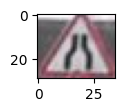

In [107]:
img_by_sign_name('1_20')

In [44]:
data = {
    'path': path_yolo_dataset,
    'train': 'train/images',
    'val': 'valid/images',
}

with open(label_map_file) as f:
    label_map = json.load(f)
    names = {v-1 : d.get(k, k) for k, v in label_map.items()}
    data['names'] = names

with open('./dataset/traffic_signs.yaml', 'w') as file:
    yaml.dump(data, file)

In [6]:
os.environ['WANDB_DISABLED'] = 'true'
model = YOLO('yolov8s.pt')

results = model.train(
   data='./dataset/traffic_signs.yaml',
   imgsz=640,
   epochs=50,
   optimizer= 'Adam',
   seed=0,
#    batch=8,
   device=[0,1]
)

Ultralytics YOLOv8.1.23 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
                                                      CUDA:1 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=./dataset/traffic_signs.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=[0, 1], workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt

100%|██████████| 755k/755k [00:00<00:00, 15.0MB/s]
2024-03-04 18:46:31.756591: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-04 18:46:31.756699: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-04 18:46:31.943797: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=155

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralyti

2024-03-04 18:46:50.887442: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-04 18:46:50.887499: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-04 18:46:50.888919: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


TensorBoard: Start with 'tensorboard --logdir runs/detect/train5', view at http://localhost:6006/


wandb: Tracking run with wandb version 0.16.2
wandb: W&B syncing is set to `offline` in this directory.  
wandb: Run `wandb online` or set WANDB_MODE=online to enable cloud syncing.


Overriding model.yaml nc=80 with nc=155
Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/working/dataset/train/labels.cache... 10595 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10595/10595 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/dataset/valid/labels.cache... 5000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:00<?, ?it/s]


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: Adam(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train5
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       2.7G      1.401      2.877     0.9681          2        640: 100%|██████████| 663/663 [03:00<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:48<00:00,  6.51it/s]


                   all       5000       8866     0.0987      0.096     0.0689     0.0392

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.89G      1.363      1.994     0.9624          5        640: 100%|██████████| 663/663 [02:47<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:45<00:00,  6.82it/s]


                   all       5000       8866      0.117      0.118      0.104     0.0646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.84G       1.29      1.813      0.947          2        640: 100%|██████████| 663/663 [02:45<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:46<00:00,  6.79it/s]


                   all       5000       8866      0.144      0.115      0.124     0.0769

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.83G      1.246      1.642     0.9342          6        640: 100%|██████████| 663/663 [02:45<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:46<00:00,  6.78it/s]


                   all       5000       8866      0.157      0.137      0.139     0.0894

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       2.8G      1.187      1.517      0.919          5        640: 100%|██████████| 663/663 [02:46<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:45<00:00,  6.84it/s]


                   all       5000       8866      0.155      0.151      0.148     0.0986

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       2.8G      1.154      1.454     0.9138          6        640: 100%|██████████| 663/663 [02:46<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:45<00:00,  6.84it/s]


                   all       5000       8866       0.17      0.155      0.165       0.11

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       2.8G      1.139      1.402     0.9059          5        640: 100%|██████████| 663/663 [02:46<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:46<00:00,  6.80it/s]


                   all       5000       8866      0.169      0.164       0.17      0.113

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       2.8G      1.114      1.336     0.9036          1        640: 100%|██████████| 663/663 [02:45<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:46<00:00,  6.76it/s]


                   all       5000       8866       0.17      0.158      0.171      0.115

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       2.8G      1.103      1.312      0.902          2        640: 100%|██████████| 663/663 [02:46<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:45<00:00,  6.93it/s]


                   all       5000       8866      0.169      0.168      0.173      0.119

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.79G      1.107      1.299     0.9038          4        640: 100%|██████████| 663/663 [02:45<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:45<00:00,  6.93it/s]


                   all       5000       8866      0.179      0.169      0.178      0.121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       2.8G      1.093      1.262     0.8915          6        640: 100%|██████████| 663/663 [02:45<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:45<00:00,  6.81it/s]


                   all       5000       8866      0.175      0.178       0.18      0.122

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       2.8G      1.077      1.221     0.8923          2        640: 100%|██████████| 663/663 [02:45<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:46<00:00,  6.78it/s]


                   all       5000       8866      0.177      0.173      0.182      0.125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       2.8G      1.068      1.198     0.8918          5        640: 100%|██████████| 663/663 [02:46<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:46<00:00,  6.74it/s]


                   all       5000       8866      0.179      0.181       0.19      0.131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.79G      1.061      1.204     0.8901          2        640: 100%|██████████| 663/663 [02:45<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:46<00:00,  6.75it/s]


                   all       5000       8866      0.179      0.177      0.188      0.125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       2.8G      1.053      1.163     0.8849          5        640: 100%|██████████| 663/663 [02:45<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:44<00:00,  6.96it/s]


                   all       5000       8866      0.183      0.184      0.194      0.134

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       2.8G       1.04      1.147     0.8821          5        640: 100%|██████████| 663/663 [02:44<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:46<00:00,  6.80it/s]


                   all       5000       8866       0.18      0.187      0.196      0.136

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       2.8G      1.032      1.151     0.8844          2        640: 100%|██████████| 663/663 [02:45<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:45<00:00,  6.84it/s]


                   all       5000       8866      0.183      0.191      0.199      0.139

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.79G      1.039      1.118     0.8855          4        640: 100%|██████████| 663/663 [02:44<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:45<00:00,  6.86it/s]


                   all       5000       8866      0.188      0.186      0.202      0.139

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       2.8G      1.046      1.109      0.883          7        640: 100%|██████████| 663/663 [02:44<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:46<00:00,  6.73it/s]


                   all       5000       8866        0.2      0.185      0.201      0.141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       2.8G      1.033      1.105     0.8842          2        640: 100%|██████████| 663/663 [02:44<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:46<00:00,  6.80it/s]


                   all       5000       8866      0.203      0.185      0.203      0.142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.81G      1.011      1.099     0.8753          3        640: 100%|██████████| 663/663 [02:44<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:45<00:00,  6.95it/s]


                   all       5000       8866       0.19      0.191      0.206      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       2.8G      1.024      1.085     0.8792          3        640: 100%|██████████| 663/663 [02:46<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:45<00:00,  6.93it/s]


                   all       5000       8866      0.195        0.2      0.209      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       2.8G      1.005      1.065     0.8758          3        640: 100%|██████████| 663/663 [02:46<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:45<00:00,  6.85it/s]


                   all       5000       8866      0.193      0.203      0.208      0.146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       2.8G      1.007      1.058     0.8779          7        640: 100%|██████████| 663/663 [02:46<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:46<00:00,  6.73it/s]


                   all       5000       8866      0.197      0.196      0.211      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       2.8G      1.011      1.039     0.8758          3        640: 100%|██████████| 663/663 [02:48<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:46<00:00,  6.79it/s]


                   all       5000       8866      0.205      0.199      0.212       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.79G     0.9935      1.036     0.8726          1        640: 100%|██████████| 663/663 [02:47<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:46<00:00,  6.74it/s]


                   all       5000       8866        0.2      0.199      0.214       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.81G     0.9872      1.021     0.8716          3        640: 100%|██████████| 663/663 [02:46<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:46<00:00,  6.80it/s]


                   all       5000       8866      0.201      0.199      0.215      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       2.8G     0.9778      1.002     0.8711          6        640: 100%|██████████| 663/663 [02:45<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:46<00:00,  6.80it/s]


                   all       5000       8866      0.203        0.2      0.218      0.154

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       2.8G     0.9613     0.9855     0.8743          7        640: 100%|██████████| 663/663 [02:45<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:44<00:00,  6.96it/s]


                   all       5000       8866        0.2      0.199      0.216      0.153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.79G      0.966       0.96     0.8693          4        640: 100%|██████████| 663/663 [02:46<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:45<00:00,  6.81it/s]


                   all       5000       8866      0.196      0.209      0.219      0.154

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.76G     0.9799     0.9673     0.8682         14        640:  36%|███▌      | 236/663 [00:59<01:43,  4.13it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:46<00:00,  6.72it/s]


                   all       5000       8866      0.203      0.214      0.227      0.163

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       2.8G     0.9299     0.8699     0.8631          5        640: 100%|██████████| 663/663 [02:46<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:45<00:00,  6.88it/s]


                   all       5000       8866      0.207      0.215      0.229      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.79G     0.9083     0.8642      0.855          2        640: 100%|██████████| 663/663 [02:45<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:45<00:00,  6.88it/s]


                   all       5000       8866        0.2      0.218      0.228      0.163
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       2.8G     0.8998     0.8484     0.8574          2        640: 100%|██████████| 663/663 [02:44<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:46<00:00,  6.78it/s]


                   all       5000       8866      0.198      0.216      0.223       0.16

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.79G     0.9028     0.8355     0.8592          2        640: 100%|██████████| 663/663 [02:41<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:46<00:00,  6.74it/s]


                   all       5000       8866        0.2      0.215      0.225      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.81G     0.8949     0.8268     0.8578          2        640: 100%|██████████| 663/663 [02:40<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:45<00:00,  6.94it/s]


                   all       5000       8866      0.203      0.213      0.224      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.79G     0.8796     0.7972     0.8534          2        640: 100%|██████████| 663/663 [02:42<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:45<00:00,  6.91it/s]


                   all       5000       8866      0.201      0.218      0.227      0.163

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       2.8G     0.8658     0.7749     0.8552          2        640: 100%|██████████| 663/663 [02:42<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:44<00:00,  6.99it/s]


                   all       5000       8866      0.202      0.217      0.226      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.79G     0.8691     0.7801     0.8514          2        640: 100%|██████████| 663/663 [02:41<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:46<00:00,  6.74it/s]


                   all       5000       8866      0.204      0.218      0.228      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       2.8G     0.8625     0.7772     0.8467          2        640: 100%|██████████| 663/663 [02:44<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:46<00:00,  6.74it/s]


                   all       5000       8866      0.206      0.218      0.228      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.79G     0.8567     0.7651     0.8436          3        640: 100%|██████████| 663/663 [02:43<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:47<00:00,  6.65it/s]


                   all       5000       8866      0.204      0.217      0.227      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.79G     0.8379     0.7335     0.8446          2        640: 100%|██████████| 663/663 [02:42<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:46<00:00,  6.73it/s]


                   all       5000       8866      0.208      0.215      0.227      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.78G     0.8474     0.7265     0.8471          2        640: 100%|██████████| 663/663 [02:43<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:46<00:00,  6.71it/s]


                   all       5000       8866      0.209      0.213      0.228      0.165

50 epochs completed in 2.969 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 22.6MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 22.6MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics YOLOv8.1.23 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
                                                      CUDA:1 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11185569 parameters, 0 gradients, 28.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:47<00:00,  6.60it/s]


                   all       5000       8866      0.208      0.213      0.228      0.165
              MainRoad       5000        934      0.989      0.478      0.927      0.667
              Children       5000        229      0.832       0.67      0.807      0.575
  ArtificialUnevenness       5000        107      0.714      0.757      0.747      0.536
            SpeedLimit       5000        343       0.83      0.426      0.756      0.517
         ZoneDirection       5000         74      0.537      0.824      0.686      0.492
 ArtificialUnevenness2       5000        154      0.821      0.682      0.793       0.59
   PedestrianCrossing2       5000       2117      0.968      0.259      0.873      0.612
  BusAndTrolleybusStop       5000        445      0.892       0.76      0.884      0.608
   EndOfSpeedLimitZone       5000         10          0          0          0          0
              StopLine       5000         97      0.688      0.866      0.807      0.546
TrafficInformationRad

wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 █▅▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:                  lr/pg1 ▃▆████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
wandb:                  lr/pg2 ▃▆████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
wandb:        metrics/mAP50(B) ▁▃▃▄▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇█▇████████████████
wandb:     metrics/mAP50-95(B) ▁▂▃▄▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇████████████████
wandb:    metrics/precision(B) ▁▂▄▅▆▅▆▅▆▆▆▆▆▆▇▇▇▇▇▇▇██▇▇▇▇▇▇▇██▇▇██████
wandb:       metrics/recall(B) ▁▂▂▃▄▅▄▅▆��▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇██████████████
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:          train/box_loss ██▇▆▅▅▄▄▄▄▄▄▃▃▃▄▃▃▃▃▃▃▃▂▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁
wandb:          train/cls_loss █▅▅▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
wandb:          train/dfl_loss ██▇▆▅▅▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▃▃▃▃▂▂▃▂▂▂▂▂▂▂▂▁▁▁▁
wandb:            val/box_loss █▆▅▄▃▄▃▃▃▂▂▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁

In [88]:
def load_img(file_path):
    im = Image.open(file_path)

    plt.figure(figsize = (20,20))
    plt.imshow(im)
    plt.show()

In [ ]:
model.predict(['/kaggle/working/ogranichenie-dvizhenija-spb.jpg', '/kaggle/working/photo_2016-02-09_18-31-26.jpg'],imgsz=640, save=True)

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


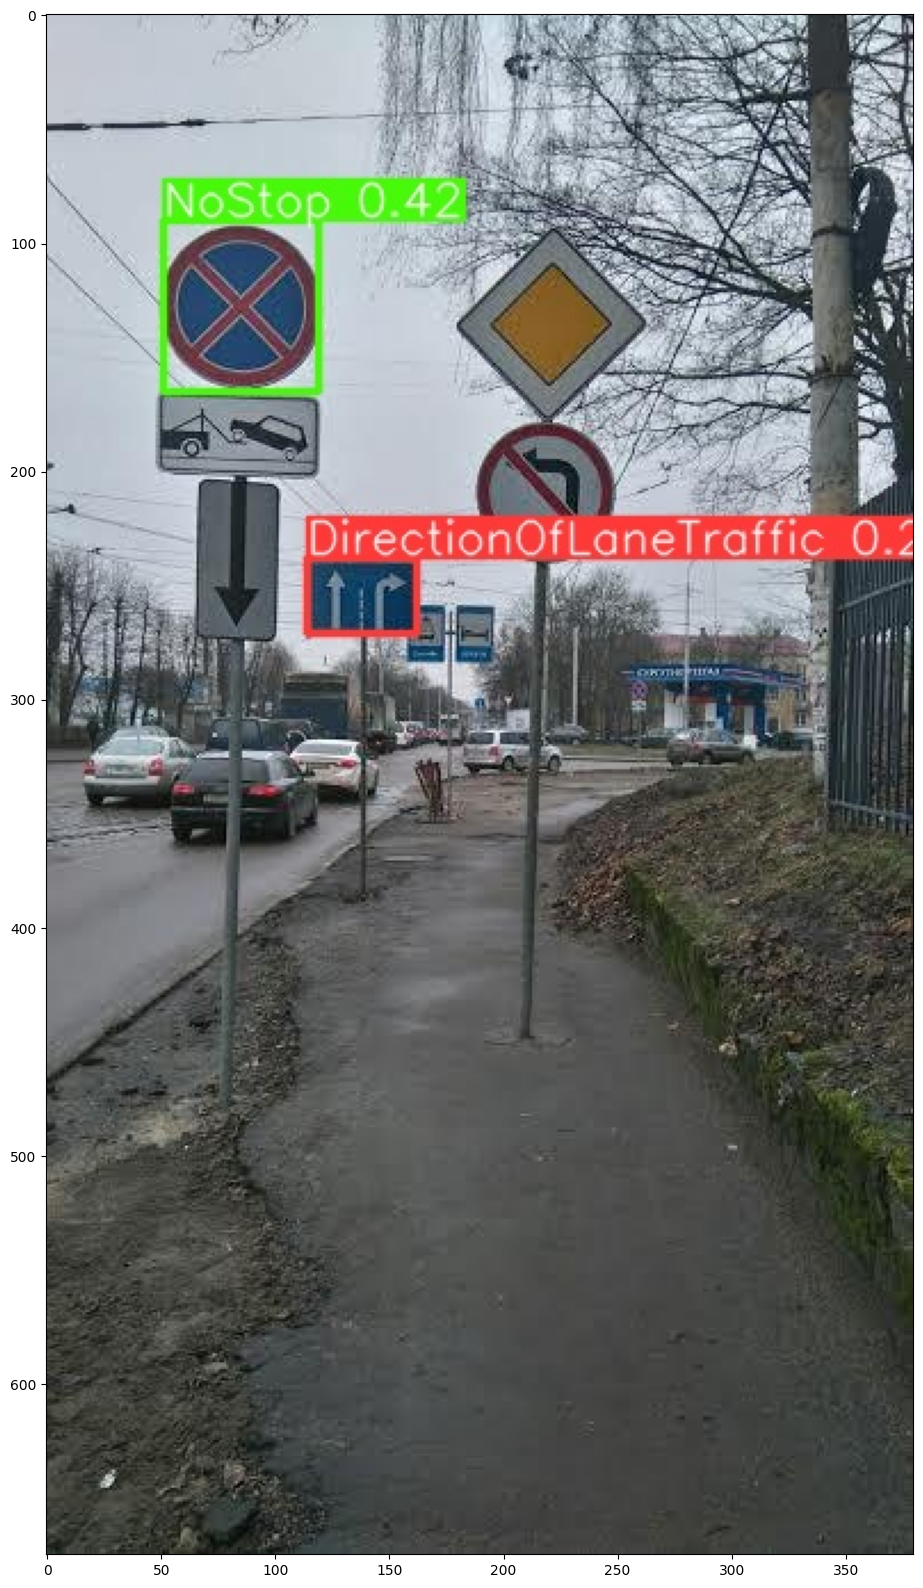

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


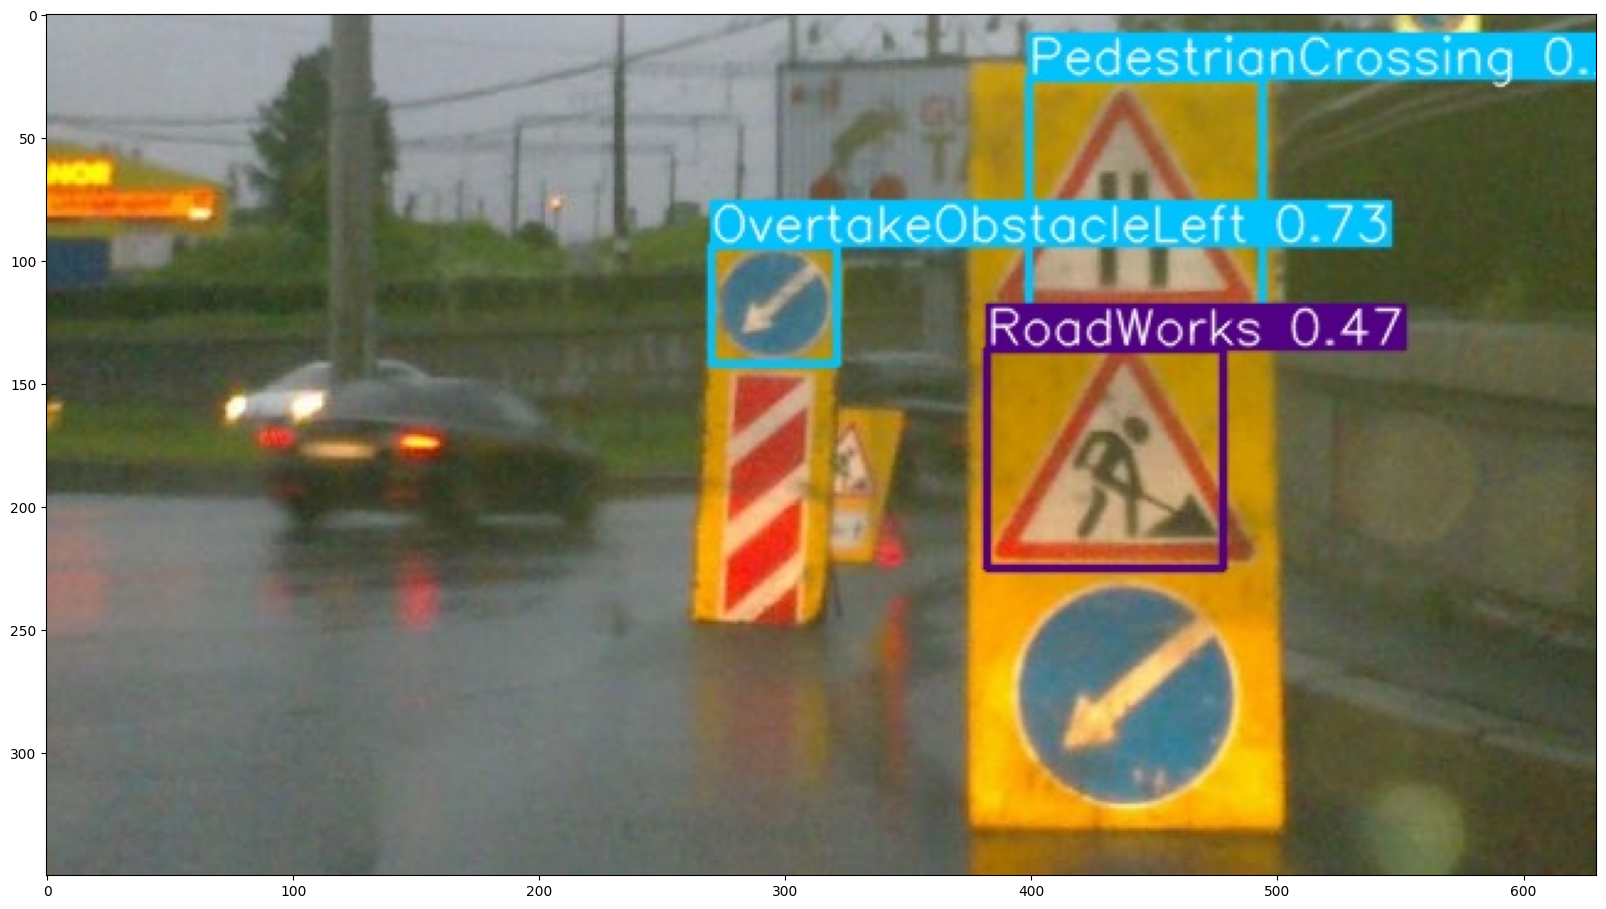

In [100]:
load_img('/kaggle/working/runs/detect/train54/photo_2016-02-09_18-31-26.jpg')
load_img('/kaggle/working/runs/detect/train54/ogranichenie-dvizhenija-spb.jpg')

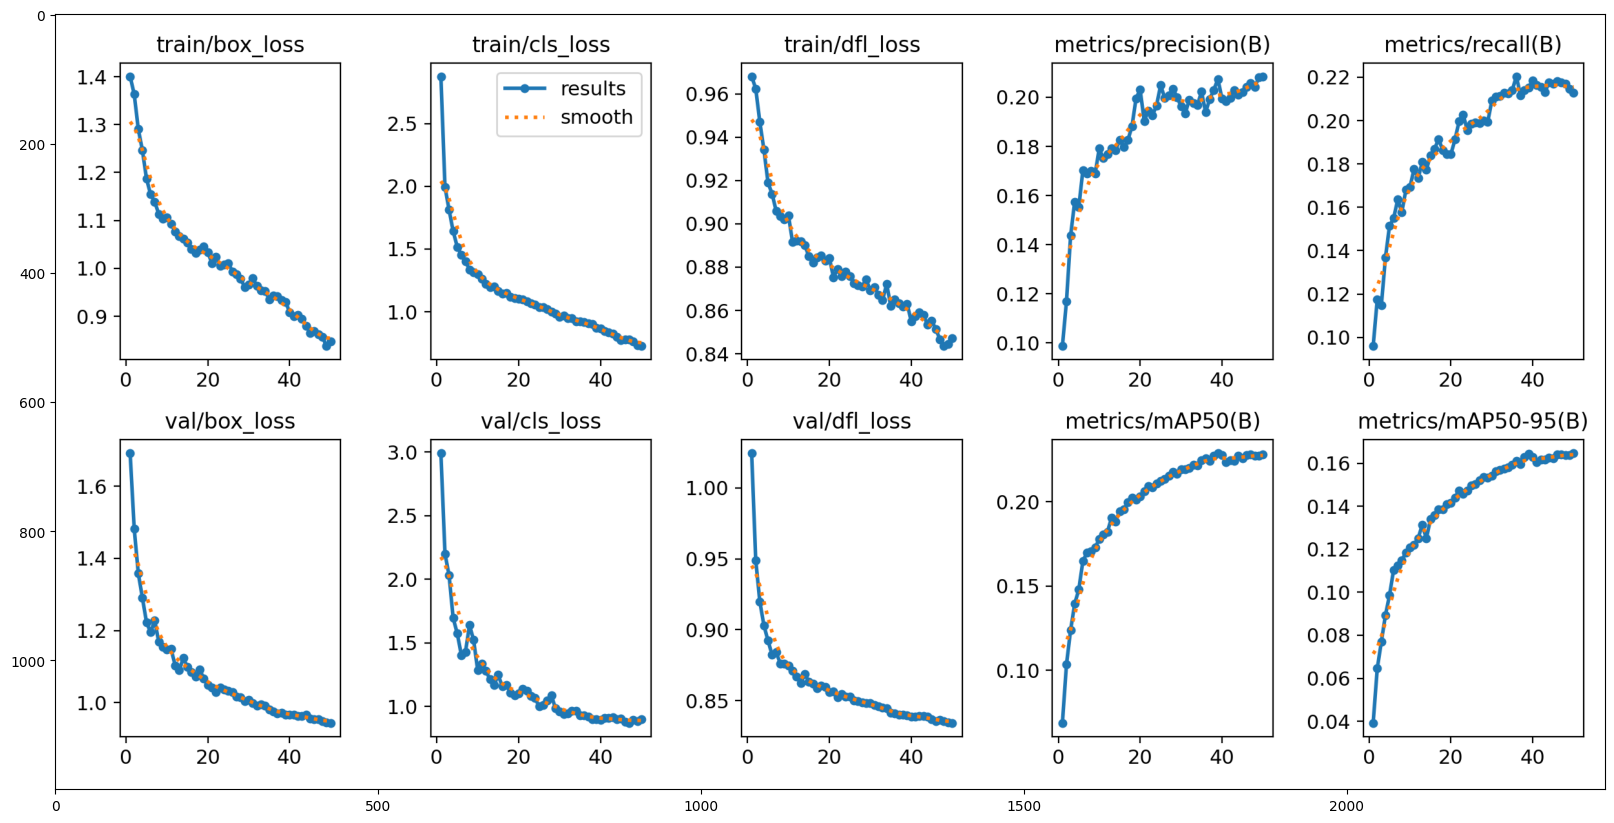

In [102]:
load_img('/kaggle/working/runs/detect/train5/results.png')